Sample 1: X_n = 10.19, A_Hat = 0.10, Gain = 0.50, Variance = 0.50
Sample 2: X_n = 10.74, A_Hat = 5.42, Gain = 0.33, Variance = 0.33
Sample 3: X_n = 8.73, A_Hat = 6.52, Gain = 0.25, Variance = 0.25
Sample 4: X_n = 9.57, A_Hat = 7.28, Gain = 0.20, Variance = 0.20
Sample 5: X_n = 9.71, A_Hat = 7.77, Gain = 0.17, Variance = 0.17
Sample 6: X_n = 8.74, A_Hat = 7.93, Gain = 0.14, Variance = 0.14
Sample 7: X_n = 10.00, A_Hat = 8.23, Gain = 0.12, Variance = 0.12
Sample 8: X_n = 10.42, A_Hat = 8.50, Gain = 0.11, Variance = 0.11
Sample 9: X_n = 9.80, A_Hat = 8.65, Gain = 0.10, Variance = 0.10
Sample 10: X_n = 10.46, A_Hat = 8.83, Gain = 0.09, Variance = 0.09
Sample 11: X_n = 10.86, A_Hat = 9.01, Gain = 0.08, Variance = 0.08
Sample 12: X_n = 10.35, A_Hat = 9.12, Gain = 0.08, Variance = 0.08
Sample 13: X_n = 10.47, A_Hat = 9.23, Gain = 0.07, Variance = 0.07
Sample 14: X_n = 9.88, A_Hat = 9.27, Gain = 0.07, Variance = 0.07
Sample 15: X_n = 9.27, A_Hat = 9.27, Gain = 0.06, Variance = 0.06
Sample 16: 

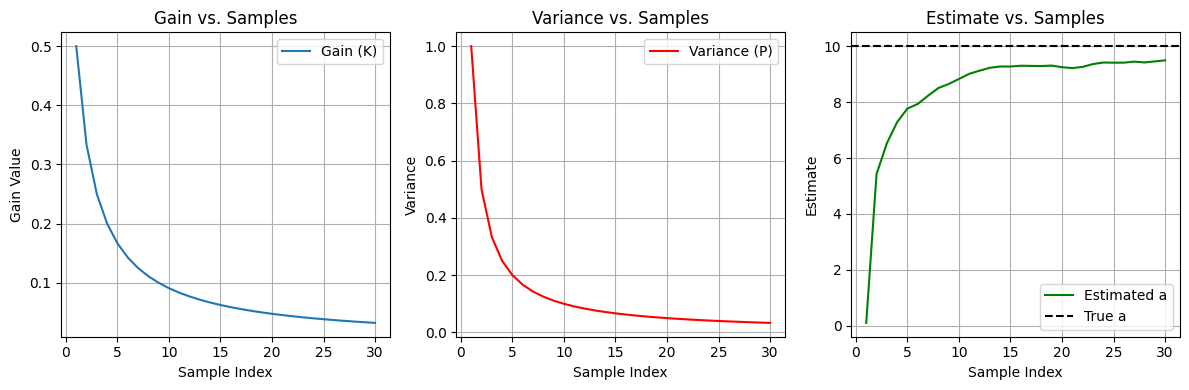

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 30

# True parameter (unknown, to be estimated)
a_true = 10.0  

# Initial estimate and variance
a_est = 0  

P = 1  # Initial variance (high uncertainty)

# Storage for plotting
estimates = [a_est]
gains = []
variances = [P]
samples = []

# Simulation loop
for n in range(1, N+1):
    w_n = np.random.randn()
    x_n = a_true + w_n  

    # Update Estimate
    a_est = estimates[-1] + K * (x_n - estimates[-1])

    # Update Gain 
    K = P / (P + 1)

    # Update Variance
    P = (1 - K) * P

    print(f"Sample {n}: X_n = {x_n:.2f}, A_Hat = {a_est:.2f}, Gain = {K:.2f}, Variance = {P:.2f}")
    # Store values for plotting
    estimates.append(a_est)
    gains.append(K)
    variances.append(P)
    samples.append(n)

# Plot Gain over Samples
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(samples, gains, label="Gain (K)")
plt.xlabel("Sample Index")
plt.ylabel("Gain Value")
plt.title("Gain vs. Samples")
plt.legend()
plt.grid()

# Plot Variance over Samples
plt.subplot(1, 3, 2)
plt.plot(samples, variances[:-1], label="Variance (P)", color='r')
plt.xlabel("Sample Index")
plt.ylabel("Variance")
plt.title("Variance vs. Samples")
plt.legend()
plt.grid()

# Plot Estimate vs. True Value
plt.subplot(1, 3, 3)
plt.plot(samples, estimates[1:], label="Estimated a", color='g')
plt.axhline(y=a_true, color='k', linestyle="--", label="True a")
plt.xlabel("Sample Index")
plt.ylabel("Estimate")
plt.title("Estimate vs. Samples")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Initial Non-Sequential Estimate: 9.84, Variance: 0.38
Sample 5: X_n = 10.57, A_Hat = 10.04, Gain = 0.28, Variance = 0.28
Sample 6: X_n = 8.75, A_Hat = 9.76, Gain = 0.22, Variance = 0.22
Sample 7: X_n = 10.71, A_Hat = 9.93, Gain = 0.18, Variance = 0.18
Sample 8: X_n = 9.58, A_Hat = 9.88, Gain = 0.15, Variance = 0.15
Sample 9: X_n = 8.55, A_Hat = 9.70, Gain = 0.13, Variance = 0.13
Sample 10: X_n = 11.69, A_Hat = 9.93, Gain = 0.12, Variance = 0.12
Sample 11: X_n = 7.68, A_Hat = 9.70, Gain = 0.10, Variance = 0.10
Sample 12: X_n = 10.78, A_Hat = 9.80, Gain = 0.09, Variance = 0.09
Sample 13: X_n = 9.12, A_Hat = 9.74, Gain = 0.09, Variance = 0.09
Sample 14: X_n = 11.32, A_Hat = 9.87, Gain = 0.08, Variance = 0.08
Sample 15: X_n = 10.34, A_Hat = 9.90, Gain = 0.07, Variance = 0.07
Sample 16: X_n = 9.84, A_Hat = 9.90, Gain = 0.07, Variance = 0.07
Sample 17: X_n = 9.98, A_Hat = 9.90, Gain = 0.06, Variance = 0.06
Sample 18: X_n = 9.39, A_Hat = 9.87, Gain = 0.06, Variance = 0.06
Sample 19: X_n = 7.8

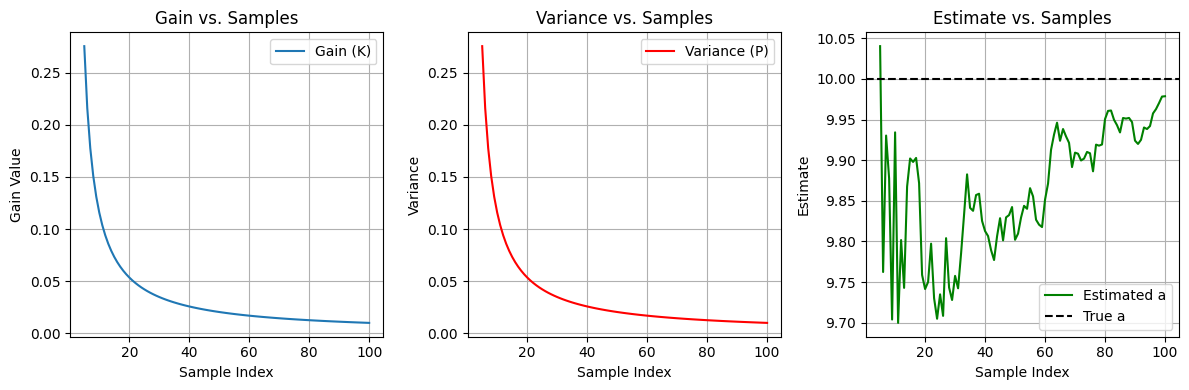

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
N = 100 

a_true = 10.0  

a_est = 0  
P = 1 

initial_samples = 4  

estimates = []
gains = []
variances = []
samples = []

x_values = []
for i in range(initial_samples):
    w_n = np.random.randn()  # Noise
    x_n = a_true + w_n  # Measurement
    x_values.append(x_n)

a_est = np.mean(x_values)
P = np.var(x_values, ddof=1)

estimates.append(a_est)
variances.append(P)

print(f"Initial Non-Sequential Estimate: {a_est:.2f}, Variance: {P:.2f}")

# Sequential Update Loop
for n in range(initial_samples + 1, N + 1):
    w_n = np.random.randn()
    x_n = a_true + w_n  

    # Compute Gain
    K = P / (P + 1)

    # Update Estimate
    a_est = a_est + K * (x_n - a_est)

    # Update Variance
    P = (1 - K) * P

    print(f"Sample {n}: X_n = {x_n:.2f}, A_Hat = {a_est:.2f}, Gain = {K:.2f}, Variance = {P:.2f}")

    # Store values for plotting
    estimates.append(a_est)
    gains.append(K)
    variances.append(P)
    samples.append(n)

# Plot Gain over Samples
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(samples, gains, label="Gain (K)")
plt.xlabel("Sample Index")
plt.ylabel("Gain Value")
plt.title("Gain vs. Samples")
plt.legend()
plt.grid()

# Plot Variance over Samples
plt.subplot(1, 3, 2)
plt.plot(samples, variances[1:], label="Variance (P)", color='r')
plt.xlabel("Sample Index")
plt.ylabel("Variance")
plt.title("Variance vs. Samples")
plt.legend()
plt.grid()

# Plot Estimate vs. True Value
plt.subplot(1, 3, 3)
plt.plot(samples, estimates[1:], label="Estimated a", color='g')
plt.axhline(y=a_true, color='k', linestyle="--", label="True a")
plt.xlabel("Sample Index")
plt.ylabel("Estimate")
plt.title("Estimate vs. Samples")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()